In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import numpy as np

import requests
import urllib
import urllib.request
import warnings
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
warnings.simplefilter(action='ignore', category=FutureWarning)
import zipfile

import os
import glob

# Question (a)
###  Load the data and then preprocess them with ImageDataGenerator().

Loading Data from URL

In [2]:
url = 'https://app.box.com/shared/static/1zggub5b7cdusj9zghm536wfk9qzixa3.zip'
r = requests.get(url)
with open("dogdata.zip", "wb") as code:
    code.write(r.content)
urllib.request.urlretrieve(url, "dogdata.zip")

('dogdata.zip', <http.client.HTTPMessage at 0x7f3085f426d0>)

Unziping file obtained form URL

In [3]:
local_zip = './dogdata.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

Defining paths to Training Data (training_path), Cross Validation Data (validation_path), and Testing Data (testing_path)

In [4]:
base_path = './dogs'
training_path = os.path.join(base_path, 'train')
validation_path = os.path.join(base_path, 'valid')
testing_path = os.path.join(base_path, 'test')

In [5]:
# Finding the Number of Classes

class_folders = glob.glob("./dogs/train/*")
print("The number of classes is: " , len(class_folders))
print(class_folders)

The number of classes is:  4
['./dogs/train/Labrador_retriever', './dogs/train/Chihuahua', './dogs/train/German_shepherd', './dogs/train/Golden_retriever']


In [6]:
# Finding the size of the images by checking in one class
class_folders_LR = glob.glob(class_folders[0]+'/*')
image_sizes = []
for i in range(0, len(class_folders_LR)):
  im = cv2.imread(class_folders_LR[i])
  image_sizes.append(im.shape)
print(image_sizes)

[(191, 200, 3), (332, 500, 3), (375, 500, 3), (403, 500, 3), (375, 500, 3), (333, 500, 3), (375, 500, 3), (400, 300, 3), (360, 269, 3), (334, 500, 3), (375, 500, 3), (500, 375, 3), (275, 360, 3), (334, 500, 3), (375, 500, 3), (341, 500, 3), (375, 500, 3), (500, 375, 3), (488, 650, 3), (365, 500, 3), (400, 500, 3), (375, 500, 3), (334, 500, 3), (375, 500, 3), (333, 500, 3), (334, 500, 3), (375, 500, 3), (479, 500, 3), (375, 500, 3), (333, 500, 3), (500, 375, 3), (500, 375, 3), (325, 500, 3), (375, 500, 3), (375, 500, 3), (480, 640, 3), (333, 500, 3), (500, 375, 3), (375, 500, 3), (375, 500, 3), (327, 500, 3), (375, 500, 3), (375, 500, 3), (500, 342, 3), (375, 500, 3), (332, 500, 3), (375, 500, 3), (500, 375, 3), (334, 500, 3), (500, 413, 3), (500, 333, 3), (375, 500, 3), (333, 500, 3), (375, 500, 3), (333, 500, 3), (375, 500, 3), (500, 375, 3), (300, 400, 3), (332, 500, 3), (288, 352, 3), (500, 331, 3), (500, 382, 3), (375, 500, 3), (375, 500, 3), (375, 500, 3), (375, 500, 3), (333, 500

Using ImageDataGenerator to generate the three different batches (Training, Cross Validation, Teasting) of tensor image data

In [7]:
training_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=training_path, target_size=(224,224), classes=['Chihuahua', 'German_shepherd', 'Golden_retriever', 'Labrador_retriever'], batch_size=10)
    
validation_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=validation_path, target_size=(224,224), classes=['Chihuahua', 'German_shepherd', 'Golden_retriever', 'Labrador_retriever'], batch_size=10)
    
testing_data = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=testing_path, target_size=(224,224), classes=['Chihuahua', 'German_shepherd', 'Golden_retriever', 'Labrador_retriever'], batch_size=10, shuffle=False)

Found 400 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 80 images belonging to 4 classes.


In [8]:
imgs, labels = next(training_data)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

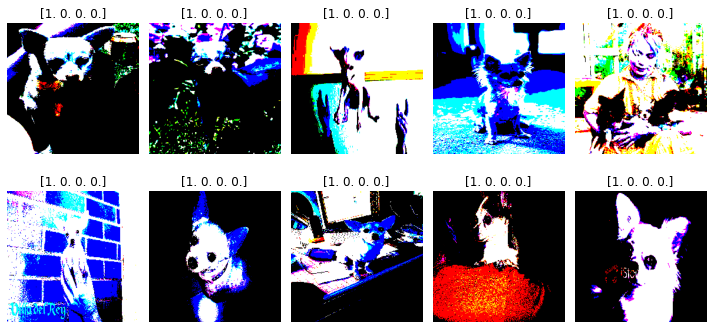

In [9]:
def plotImages(images_arr, labels):
    fig, axes = plt.subplots(2, 5, figsize=(10,5))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)
    plt.tight_layout()
    plt.show()

plotImages(imgs, labels)

# Question (b)
### Build a convolutional neural network either from scratch or using existing models.

In [10]:
vgg16_model = tf.keras.applications.vgg16.VGG16(input_shape=(224,224,3),weights='imagenet')
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False
model.add(Dense(units=4, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy', keras.metrics.AUC(name='auc', multi_label = True)])

# Question (c)
### Train the neural network, evaluate the model prediction, and obtain the evaluation metrics, including prediction accuracy and confusion matrix.

In [11]:
model.fit(x = training_data, validation_batch_size = validation_data, epochs=10,verbose=2)
output_layer = model.predict(x=testing_data, verbose=0)

Epoch 1/10
40/40 - 11s - loss: 1.6634 - accuracy: 0.4050 - auc: 0.6566 - 11s/epoch - 285ms/step
Epoch 2/10
40/40 - 5s - loss: 0.6967 - accuracy: 0.7175 - auc: 0.9152 - 5s/epoch - 132ms/step
Epoch 3/10
40/40 - 5s - loss: 0.4121 - accuracy: 0.8500 - auc: 0.9693 - 5s/epoch - 132ms/step
Epoch 4/10
40/40 - 5s - loss: 0.3050 - accuracy: 0.8900 - auc: 0.9827 - 5s/epoch - 131ms/step
Epoch 5/10
40/40 - 5s - loss: 0.2285 - accuracy: 0.9200 - auc: 0.9904 - 5s/epoch - 133ms/step
Epoch 6/10
40/40 - 5s - loss: 0.1828 - accuracy: 0.9475 - auc: 0.9943 - 5s/epoch - 132ms/step
Epoch 7/10
40/40 - 5s - loss: 0.1559 - accuracy: 0.9575 - auc: 0.9958 - 5s/epoch - 132ms/step
Epoch 8/10
40/40 - 5s - loss: 0.1264 - accuracy: 0.9700 - auc: 0.9978 - 5s/epoch - 132ms/step
Epoch 9/10
40/40 - 5s - loss: 0.1089 - accuracy: 0.9725 - auc: 0.9986 - 5s/epoch - 134ms/step
Epoch 10/10
40/40 - 5s - loss: 0.0929 - accuracy: 0.9825 - auc: 0.9990 - 5s/epoch - 132ms/step


In [12]:
Loss, Accuracy, AUC = model.evaluate(x=testing_data, verbose=2)
print("Loss: ", Loss)
print("Prediction Accuracy: ", Accuracy*100, '%')
print("AUC: ", AUC)

8/8 - 2s - loss: 0.2805 - accuracy: 0.9000 - auc: 0.9835 - 2s/epoch - 233ms/step
Loss:  0.280547559261322
Prediction Accuracy:  89.99999761581421 %
AUC:  0.9835416078567505


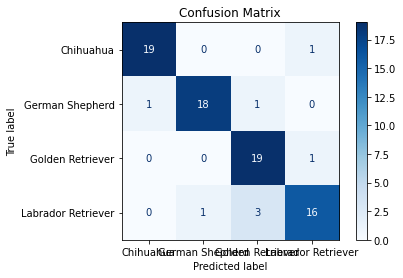

In [13]:
trueY = testing_data.classes
predictedY = np.argmax(output_layer, axis=-1)

cm = confusion_matrix(trueY, predictedY)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Chihuahua', 'German Shepherd', 'Golden Retriever', 'Labrador Retriever'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.rcParams["figure.figsize"] = (12,12)
plt.show()

In [14]:
report = classification_report(list(predictedY), trueY, labels=[0, 1, 2, 3])
print(report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.90      0.95      0.92        19
           2       0.95      0.83      0.88        23
           3       0.80      0.89      0.84        18

    accuracy                           0.90        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.90      0.90      0.90        80

